In [1]:
sentences = [  
    # Botanic context  
    "I planted a maple tree in the backyard.",  
    "The tree provides shade during hot summer days.",  
    "We sat under the old oak tree.",  
    "The tree blossoms in the spring.",  
    "The apple tree bears fruit every autumn.",  
    "The tree's roots were deep in the ground.",  
    "The tree's leaves turned yellow and fell off.",  
    "The pine tree stood tall in the forest.",  
    "The willow tree hung over the pond.",  
    "The tree was cut down to make room for new construction.",  
      
    # Computer programming context  
    "The binary tree is a fundamental data structure in computer science.",  
    "Each node in the tree stores a piece of data.",  
    "The tree structure allows efficient search and sort operations.",  
    "The tree is traversed in a pre-order, in-order, or post-order manner.",  
    "A balanced binary tree offers optimal performance.",  
    "The tree's root node has no parent.",  
    "Each node in the tree has a link to its parent and children.",  
    "The tree's leaf nodes have no children.",  
    "A tree in computer science is not necessarily rooted.",  
    "The tree algorithm was implemented recursively.",  
      
    # Family tree context  
    "My family tree traces back to the 16th century.",  
    "I am researching my family tree.",  
    "My family tree has branches all over the world.",  
    "The family tree shows our genealogy.",  
    "I found an interesting ancestor in our family tree.",  
    "My family tree is quite complex.",  
    "Our family tree includes several notable individuals.",  
    "The family tree reveals our heritage.",  
    "I discovered distant relatives through the family tree.",  
    "The family tree helps us understand our roots.",  
]  


In [2]:
import os
from sentence_transformers import SentenceTransformer, util
from visualization_utils import openai_plot_2D, plot_embeddings

# https://www.sbert.net/docs/pretrained_models.html
transformers_cache = os.environ.get('TRANSFORMERS_CACHE')
print(transformers_cache)


# https://www.sbert.net/docs/pretrained_models.html
#model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2', cache_folder=transformers_cache)
model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2', cache_folder=transformers_cache)
#model = SentenceTransformer('sentence-transformers/distiluse-base-multilingual-cased-v1', cache_folder=transformers_cache)
#model = SentenceTransformer('sentence-transformers/all-MiniLM-L12-v2', cache_folder=transformers_cache)

None


In [3]:
from pprint import pprint
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np

# Now we want to transform all sentences with bert
embeddings = model.encode(sentences)

# calculate the module of all vectors in embeddings
vectors_module = np.linalg.norm(embeddings, axis=1)
vectors_module = np.round(vectors_module, decimals=5)

# Verify if the vectors are normalized vectors or not. This is important
# because the cosine similarity is defined as the dot product
# between two normalized vectors. 
pprint(vectors_module)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)


In [4]:

#and now I want to print a matrix with the cosine similarity of each sentence with each other sentence
#df = pd.DataFrame(cosine_similarity(embeddings))
df = pd.DataFrame(util.cos_sim(embeddings, embeddings))
dfdot = pd.DataFrame(util.dot_score(embeddings, embeddings))

df.columns = range(len(sentences))
df.index = range(len(sentences))

df


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.000001,0.379074,0.438231,0.394226,0.349881,0.440442,0.356594,0.377756,0.355876,0.366681,...,0.179801,0.101939,0.263587,0.268386,0.255395,0.191189,0.115046,0.191750,0.259921,0.181078
1,0.379074,1.000000,0.324594,0.478924,0.330001,0.396967,0.373736,0.397548,0.357843,0.395542,...,0.047311,0.111321,0.189122,0.268728,0.120580,0.079022,0.130827,0.174632,0.093574,0.184273
2,0.438231,0.324594,1.000000,0.204113,0.261483,0.469505,0.346595,0.357929,0.379301,0.335733,...,0.184805,0.122329,0.135003,0.268346,0.274595,0.119858,0.124624,0.209225,0.194462,0.173632
3,0.394226,0.478924,0.204113,1.000000,0.478752,0.375137,0.331218,0.343849,0.291768,0.312572,...,0.076369,0.141254,0.208064,0.243591,0.159511,0.110941,0.146727,0.177084,0.116164,0.194286
4,0.349881,0.330001,0.261483,0.478752,1.000000,0.307125,0.340227,0.317160,0.209402,0.245091,...,0.158038,0.172083,0.225358,0.252964,0.188874,0.181409,0.158809,0.237713,0.178584,0.256958
5,0.440442,0.396967,0.469505,0.375137,0.307125,1.000000,0.439137,0.510066,0.364328,0.406205,...,0.203870,0.214643,0.289254,0.268393,0.282608,0.196283,0.164778,0.257354,0.253854,0.340003
6,0.356594,0.373736,0.346595,0.331218,0.340227,0.439137,1.000000,0.323896,0.366478,0.503313,...,0.095690,0.133874,0.184075,0.235226,0.157790,0.124000,0.082462,0.191889,0.181661,0.187443
7,0.377756,0.397548,0.357929,0.343849,0.317160,0.510066,0.323896,1.000001,0.448174,0.411447,...,0.072681,0.107270,0.153033,0.194204,0.147737,0.068517,0.107264,0.134220,0.105911,0.127045
8,0.355876,0.357843,0.379301,0.291768,0.209402,0.364328,0.366478,0.448174,1.000000,0.331057,...,0.137727,0.143783,0.164372,0.236765,0.229736,0.093449,0.143333,0.174167,0.123409,0.167201
9,0.366681,0.395542,0.335733,0.312572,0.245091,0.406205,0.503313,0.411447,0.331057,1.000000,...,0.055208,0.111633,0.077176,0.231224,0.127728,0.031994,0.059000,0.152864,0.057426,0.150793


In [5]:
# now we can plot the embeddings
chart  = plot_embeddings(sentences, embeddings)
chart.interactive()


/Users/gianmariaricci/develop/github/ai-playground/src/python/langchainVarious/langchain/lib/python3.11/site-packages/altair/utils/core.py:410: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


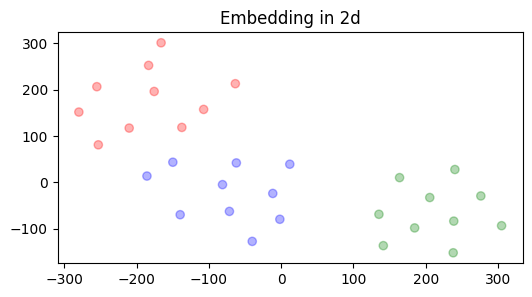

True


In [6]:

openai_plot_2D(sentences, embeddings, show_labels=False)

In [7]:
import os
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file
#print out the value of the environment variable OPENAI_API_KEY

from openai import AzureOpenAI
client = AzureOpenAI(
    api_key=os.getenv("OPENAI_API_KEY"),  
    api_version="2023-12-01-preview",
    azure_endpoint=os.getenv("AZURE_ENDPOINT")
)

embeddings_ada = []

response = client.embeddings.create(
    input=sentences,
        model="text-embedding-ada-002"
)

for data in response.data:
    embeddings_ada.append(data.embedding)

# Now we can plot the embeddings
chart = plot_embeddings(sentences, embeddings_ada)
chart.interactive()


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


/Users/gianmariaricci/develop/github/ai-playground/src/python/langchainVarious/langchain/lib/python3.11/site-packages/altair/utils/core.py:410: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [ ]:
openai_plot_2D(sentences, embeddings_ada, show_labels=True)


In [ ]:
# now use openai new models
from openai import OpenAI
client = OpenAI()
client.api_key = os.getenv('OPENAI_API_KEY_NOT_AZURE')

response_te3_large = client.embeddings.create(
    input=sentences,
    model="text-embedding-3-large"
)

embeddings_te3_large = []
for data in response_te3_large.data:
    embeddings_te3_large.append(data.embedding)

openai_plot_2D(sentences, embeddings_te3_large, show_labels=False)


In [ ]:
#Now reduce dimensions
# now use openai new models
from openai import OpenAI
client = OpenAI()
client.api_key = os.getenv('OPENAI_API_KEY_NOT_AZURE')

response_te3_large_512 = client.embeddings.create(
    input=sentences,
    dimensions=512,
    model="text-embedding-3-large"
)

embeddings_te3_large_512 = []
for data in response_te3_large_512.data:
    embeddings_te3_large_512.append(data.embedding)

openai_plot_2D(sentences, embeddings_te3_large_512, show_labels=False)

In [ ]:
#Now reduce dimensions a lot
# now use openai new models
from openai import OpenAI
client = OpenAI()
client.api_key = os.getenv('OPENAI_API_KEY_NOT_AZURE')

response_te3_large_128 = client.embeddings.create(
    input=sentences,
    dimensions=128,
    model="text-embedding-3-large"
)

embeddings_te3_large_128 = []
for data in response_te3_large_128.data:
    embeddings_te3_large_128.append(data.embedding)

openai_plot_2D(embeddings_te3_large_128)

In [ ]:
chart  = plot_embeddings(sentences, embeddings_te3_large_128)

chart.interactive()

In [ ]:
import random
#last time with bert

# Encode the shuffled sentences using the model
embeddings_bert = model.encode(sentences)

# Plot the embeddings in 2D
openai_plot_2D(embeddings_bert)

